In [2]:

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, Dropout, LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df = pd.read_csv(r"C:\Users\gayat\Downloads\imdb\IMDB Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [5]:
# Label Encoding: Convert 'positive' to 1 and 'negative' to 0
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [6]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

# Text Preprocessing: Tokenization & Padding
vocab_size = 10000  # Number of unique words to keep
max_length = 200  # Max review length
oov_token = "<OOV>"  # Out of vocabulary token

In [7]:
# Initialize Tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input size
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# Build the Deep Neural Network Model
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_length),  # Embedding layer
    LSTM(64, return_sequences=True),  # LSTM layer for sequential data
    LSTM(32),  # Another LSTM layer
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(32, activation='relu'),  # Dense hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the Model
history = model.fit(X_train_pad, y_train, epochs=20, batch_size=32, validation_data=(X_test_pad, y_test))

# Evaluate the Model
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary labels

Epoch 1/20


C:\Users\gayat\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 106s 83ms/step - accuracy: 0.5179 - loss: 0.6906 - val_accuracy: 0.4961 - val_loss: 0.6937
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 105s 84ms/step - accuracy: 0.5352 - loss: 0.6850 - val_accuracy: 0.7075 - val_loss: 0.6125
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 105s 84ms/step - accuracy: 0.5008 - loss: 0.7001 - val_accuracy: 0.4961 - val_loss: 0.6941
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 115s 92ms/step - accuracy: 0.5007 - loss: 0.6937 - val_accuracy: 0.4962 - val_loss: 0.6919
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 118s 94ms/step - accuracy: 0.5882 - loss: 0.6637 - val_accuracy: 0.6785 - val_loss: 0.6637
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 103s 82ms/step - accuracy: 0.7309 - loss: 0.5267 - val_accuracy: 0.8713 - val_loss: 0.3131
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 119s 95ms/step - accuracy: 0.9043 - loss: 0.2597 - val_accuracy: 0.8677 - val_loss: 0.3190
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 113s 90ms/step - accuracy: 0.9282 - lo

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Analyze Misclassifications
misclassified_idx = np.where(y_pred.flatten() != y_test.values)[0]
print(f"Number of Misclassified Samples: {len(misclassified_idx)}")
print("\nSome Misclassified Reviews:")
for i in misclassified_idx[:5]:  # Show 5 misclassified reviews
    print("\nReview:", X_test.iloc[i])
    print("True Sentiment:", "Positive" if y_test.iloc[i] == 1 else "Negative")
    print("Predicted Sentiment:", "Positive" if y_pred[i] == 1 else "Negative")

Test Accuracy: 0.8594
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      4961
           1       0.87      0.85      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Number of Misclassified Samples: 1406

Some Misclassified Reviews:

Review: I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me for some reason. Anyways, this could have been one of the best Summerslam's ever if the WWF didn't have Lex Luger in the main event against Yokozuna, now for it's time it was ok to have a huge fat man vs a strong man but I'm glad times have changed. It was a terrible main event just like every match Luger is in is terrible. Other matches on the card were Razor Ramon vs Ted Dibiase, Steiner Brothers vs Heavenly Bodies, Shawn M

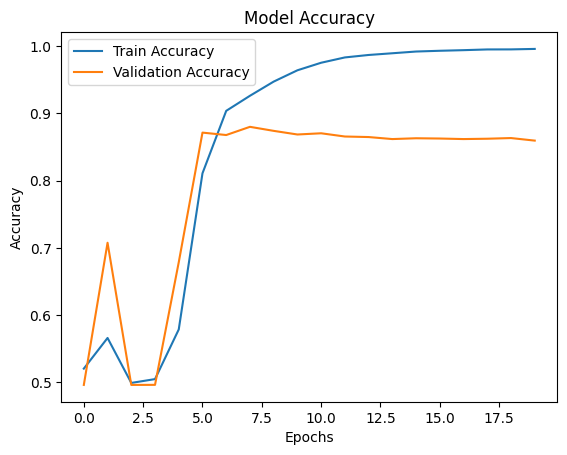

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()


In [14]:
sample_review = "This movie was absolutely amazing, I loved every bit of it!"

# Step 1: Preprocess
sample_seq = tokenizer.texts_to_sequences([sample_review])
sample_pad = pad_sequences(sample_seq, maxlen=max_length, padding='post', truncating='post')

# Step 2: Predict
prediction = model.predict(sample_pad)

# Step 3: Interpret
print(f"Confidence Score: {prediction[0][0]}")
if prediction[0][0] > 0.5:
    print("Predicted Sentiment: Positive 😊")
else:
    print("Predicted Sentiment: Negative 😞")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Confidence Score: 0.9916250109672546
Predicted Sentiment: Positive 😊
